## Laboratorio de implementación - Limpieza de datos y exploración

La información que vamos a utilizar está en el siguiente link: https://www.imdb.com/interfaces/

Es clave que cuando tengamos una base de dato, lo primero que intentemos es entender es de donde salio y que representa. Por eso, cuando hay documentación, lo más importante es leerla primero.

### IMDB - Internet Movie Database
<img src="imdb-banner-1.jpeg">

La base de datos de IMDB esta compuesta por 7 tablas:
* <b>title.akas.tsv.gz</b> - Contains the following information for titles:
    - titleId (string) - a tconst, an alphanumeric unique identifier of the title ordering (integer) – a number to uniquely identify rows for a given titleId
    - title (string) – the localized title
    - region (string) - the region for this version of the title
    - language (string) - the language of the title
    - types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
    - attributes (array) - Additional terms to describe this alternative title, not enumerated
    - isOriginalTitle (boolean) – 0: not original title; 1: original title
* <b>title.basics.tsv.gz</b> - Contains the following information for titles:
    - tconst (string) - alphanumeric unique identifier of the title
    - titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
    - primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
    - originalTitle (string) - original title, in the original language
    - isAdult (boolean) - 0: non-adult title; 1: adult title
    - startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
    - endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
    - runtimeMinutes – primary runtime of the title, in minutes
    - genres (string array) – includes up to three genres associated with the title
* <b> title.crew.tsv.gz</b> – Contains the director and writer information for all the titles in IMDb. Fields include:
    - tconst (string) - alphanumeric unique identifier of the title
    - directors (array of nconsts) - director(s) of the given title
    - writers (array of nconsts) – writer(s) of the given title
* <b> title.episode.tsv.gz</b> – Contains the tv episode information. Fields include:
    - tconst (string) - alphanumeric identifier of episode
    - parentTconst (string) - alphanumeric identifier of the parent TV Series
    - seasonNumber (integer) – season number the episode belongs to 
    - episodeNumber (integer) – episode number of the tconst in the TV series
* <b> title.principals.tsv.gz </b> – Contains the principal cast/crew for titles
    - tconst (string) - alphanumeric unique identifier of the title
    - ordering (integer) – a number to uniquely identify rows for a given titleId
    - nconst (string) - alphanumeric unique identifier of the name/person
    - category (string) - the category of job that person was in
    - job (string) - the specific job title if applicable, else '\N'
    - characters (string) - the name of the character played if applicable, else '\N'
* <b>title.ratings.tsv.gz</b> – Contains the IMDb rating and votes information for titles
    - tconst (string) - alphanumeric unique identifier of the title
    - averageRating – weighted average of all the individual user ratings
    - numVotes - number of votes the title has received
* <b>name.basics.tsv.gz</b> – Contains the following information for names:
    - nconst (string) - alphanumeric unique identifier of the name/person
    - primaryName (string)– name by which the person is most often credited
    - birthYear – in YYYY format
    - deathYear – in YYYY format if applicable, else '\N'
    - primaryProfession (array of strings)– the top-3 professions of the person
    - knownForTitles (array of tconsts) – titles the person is known for

In [1]:
#Importamos la librerías que vamos a usar:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#Seteo opciones de pandas para evitar truncar columnas/filas
pd.set_option('display.max_columns', None) #evitar truncar columnas
#pd.set_option('display.max_rows', 20) #evitar truncar filas

In [2]:
#Veamos los datasets que tengo
os.listdir('/Users/adambrosio/Documents/GitHub/DMA_LABO_Austral_2021_rosario/Data/')

['usuariosapp.csv',
 'ordenes.csv',
 'title.ratings.tsv',
 '.DS_Store',
 'title.principals.tsv',
 'title.akas.tsv',
 'name.basics.tsv',
 'titanic.csv',
 'encuestas_satisfaccion.xlsx',
 'title.basics.tsv',
 'title.episode.tsv',
 'title.crew.tsv']

In [3]:
path='/Users/adambrosio/Documents/GitHub/DMA_LABO_Austral_2021_rosario/Data/'

In [4]:
#Vamos a arrancar explorando el de title basics que parece ser el archivo más interesante para comenzar
title_basics = pd.read_csv(path+'title.basics.tsv',sep="\t")

In [5]:
#Veamos que hay en el archivo
title_basics.head(-5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7872533,tt9916838,tvEpisode,Episode #3.13,Episode #3.13,0,2010,\N,\N,"Action,Drama,Family"
7872534,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Animation,Comedy,Family"
7872535,tt9916842,tvEpisode,Episode #3.16,Episode #3.16,0,2010,\N,\N,"Action,Drama,Family"
7872536,tt9916844,tvEpisode,Episode #3.15,Episode #3.15,0,2010,\N,\N,"Action,Drama,Family"


In [6]:
#Veamos si hay nulos
title_basics.isna()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
7872538,False,False,False,False,False,False,False,False,False
7872539,False,False,False,False,False,False,False,False,False
7872540,False,False,False,False,False,False,False,False,False
7872541,False,False,False,False,False,False,False,False,False


In [7]:
len(title_basics)

7872543

In [8]:
#Veamos si hay nulos

title_basics.isna().sum()

tconst             0
titleType          0
primaryTitle       9
originalTitle      9
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

In [11]:
# Veamos los que tienen título nulo
title_basics[title_basics.primaryTitle.isna()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1419248,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N
3408321,tt14273442,tvEpisode,NaN,NaN,0,2021,\N,\N,"Action,Thriller"
3545049,tt14510930,tvEpisode,NaN,NaN,0,\N,\N,\N,\N
4079783,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
4172330,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
5946209,tt5773048,tvEpisode,NaN,NaN,0,2015,\N,\N,Talk-Show
7191316,tt8473688,tvEpisode,NaN,NaN,0,1987,\N,\N,Drama
7223024,tt8541336,tvEpisode,NaN,NaN,0,2018,\N,\N,"Reality-TV,Romance"
7828493,tt9824302,tvEpisode,NaN,NaN,0,2016,\N,\N,Documentary


In [12]:
# Veamos los que tienen generos nulos
title_basics[title_basics.genres.isna()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1101610,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,NaN
1523004,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,\N,NaN
1921064,tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,0,1981,\N,\N,Documentary,NaN
2034790,tt11868642,tvEpisode,GGN Heavyweight Championship Lungs With Mike T...,0,2020,\N,\N,Talk-Show,NaN
2195129,tt12149332,tvEpisode,Jeopardy! College Championship Semifinal Game ...,0,2020,\N,\N,Game-Show,NaN
2346010,tt12415330,tvEpisode,Anthony Davis High Brow Tank\tAnthony Davis Hi...,0,2017,\N,\N,Reality-TV,NaN
3081881,tt13704268,tvEpisode,Bay of the Triffids/Doctor of Doom\tBay of the...,0,\N,\N,\N,"Animation,Comedy,Family",NaN
5149171,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
7827783,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
7868883,tt9909210,tvEpisode,Politik und/oder Moral - Wie weit geht das Ver...,0,2005,\N,\N,\N,NaN


In [13]:
#Tipo de datos de las columnas

title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [14]:
#Ver que tipos de datos hay en cada columna

columna='startYear'

lista=[]
lista.append(type(title_basics[columna][0]))

for ele in title_basics[columna]:
    a=type(ele)
    if a==lista[-1]:
        continue
    else:
        lista.append(a)
        print(lista)

[<class 'int'>, <class 'str'>]


In [15]:
title_basics.startYear.astype('float')

ValueError: could not convert string to float: '\\N'

In [ ]:
pd.to_numeric(title_basics['startYear'])

In [16]:
title_basics.iloc[65776]

tconst                tt0067103
titleType                 movie
primaryTitle        Fleur bleue
originalTitle       Fleur bleue
isAdult                       0
startYear                  1971
endYear                      \N
runtimeMinutes               81
genres            Drama,Romance
Name: 65776, dtype: object

In [17]:
# Con esto convierto a número y fuerzo a que tome valores nulos cuando no puede

pd.to_numeric(title_basics['startYear'],errors='coerce').iloc[65776]

1971.0

In [18]:
# Con esto convierto a número y fuerzo a que tome valores nulos cuando no puede


title_basics['startYear'] = pd.to_numeric(title_basics['startYear'],errors='coerce')

In [19]:
#Convierto las columnas numéricas

title_basics['endYear'] = pd.to_numeric(title_basics['endYear'],errors='coerce')
title_basics['runtimeMinutes'] = pd.to_numeric(title_basics['runtimeMinutes'],errors='coerce')

In [20]:
#Convierto las columnas de texto

title_basics['tconst']=title_basics['tconst'].astype('string')
title_basics['titleType']=title_basics['titleType'].astype('string')
title_basics['primaryTitle']=title_basics['primaryTitle'].astype('string')
title_basics['originalTitle']=title_basics['originalTitle'].astype('string')
title_basics['genres']=title_basics['genres'].astype('string')

In [21]:
#Veamos como quedaron los tipos de cada columna
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7872543 entries, 0 to 7872542
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          string 
 1   titleType       string 
 2   primaryTitle    string 
 3   originalTitle   string 
 4   isAdult         object 
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  float64
 8   genres          string 
dtypes: float64(3), object(1), string(5)
memory usage: 540.6+ MB


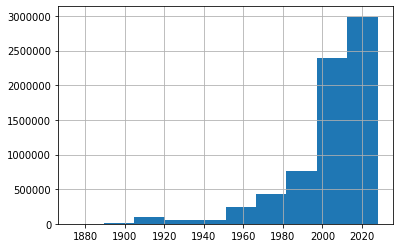

In [22]:
#Veamos un histograma de como estan distribuidas las peliculas

title_basics.startYear.hist()

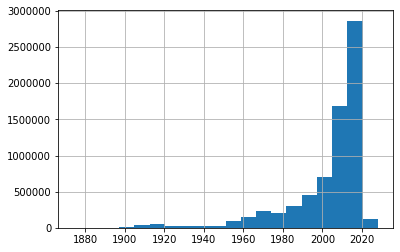

In [23]:
#Veamos un histograma de como estan distribuidas las peliculas (ahora con bins)
title_basics.startYear.hist(bins=20)

In [24]:
#Cual es el minimo

title_basics.startYear.min()

1874.0

In [25]:
#Cual es el máximo

title_basics.startYear.max()

2028.0

In [26]:
#Veamos cual es la peli con el máximo
title_basics.loc[title_basics['startYear'] == 2028.0]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
3198386,tt13907072,movie,Skyscraper on an Uninhabited Island 4,Skyscraper on an Uninhabited Island 4,0,2028.0,NaN,NaN,"Adventure,Sci-Fi"
3318031,tt14115422,movie,Cut! : The Cooper Landers Story,Cut! : The Cooper Landers Story,0,2028.0,NaN,NaN,Documentary
5886678,tt5637536,movie,Avatar 5,Avatar 5,0,2028.0,NaN,NaN,"Action,Adventure,Drama"


In [27]:
title_basics.iloc[5886678]

tconst                         tt5637536
titleType                          movie
primaryTitle                    Avatar 5
originalTitle                   Avatar 5
isAdult                                0
startYear                           2028
endYear                              NaN
runtimeMinutes                       NaN
genres            Action,Adventure,Drama
Name: 5886678, dtype: object

In [28]:
print('https://www.imdb.com/title/tt5174640/')

https://www.imdb.com/title/tt5174640/


In [29]:
#Veamos cual es la peli con el minimo
title_basics.loc[title_basics['startYear'] == 1874]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4787587,tt3155794,short,Passage de Venus,Passage de Venus,0,1874.0,NaN,1.0,"Documentary,Short"


In [30]:
print('https://www.imdb.com/title/tt3155794/')

https://www.imdb.com/title/tt3155794/


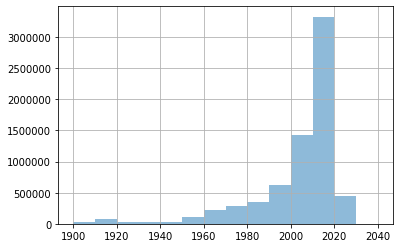

In [31]:
#Armemos ahora un histograma con bins especificdos

title_basics.startYear.hist(bins=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040],
                            alpha=0.5)

In [32]:
#Armemos rangos de fechas
list(range(1900, 2020))

[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [33]:
fechas=list(range(1900, 2023))

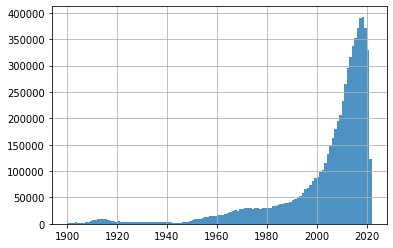

In [34]:
# Usemos esos rangos ahora
title_basics.startYear.hist(bins=fechas,alpha=0.8)

In [35]:
# Que tipo de entidades tenemos
title_basics.titleType.unique()

<StringArray>
[       'short',        'movie',      'tvShort',      'tvMovie',
     'tvSeries',    'tvEpisode', 'tvMiniSeries',    'tvSpecial',
        'video',    'videoGame']
Length: 10, dtype: string

titleType
movie           AxesSubplot(0.125,0.125;0.775x0.755)
short           AxesSubplot(0.125,0.125;0.775x0.755)
tvEpisode       AxesSubplot(0.125,0.125;0.775x0.755)
tvMiniSeries    AxesSubplot(0.125,0.125;0.775x0.755)
tvMovie         AxesSubplot(0.125,0.125;0.775x0.755)
tvSeries        AxesSubplot(0.125,0.125;0.775x0.755)
tvShort         AxesSubplot(0.125,0.125;0.775x0.755)
tvSpecial       AxesSubplot(0.125,0.125;0.775x0.755)
video           AxesSubplot(0.125,0.125;0.775x0.755)
videoGame       AxesSubplot(0.125,0.125;0.775x0.755)
Name: startYear, dtype: object

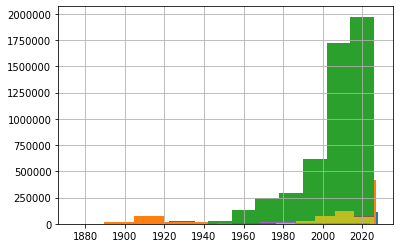

In [36]:
title_basics.groupby('titleType').startYear.hist(stacked=True)

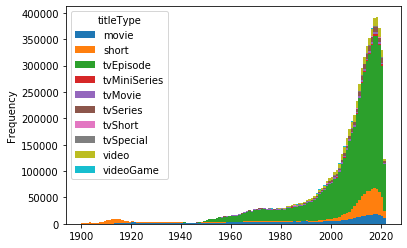

In [37]:
title_basics.pivot(columns='titleType').startYear.plot(kind = 'hist', stacked=True,bins=fechas)

In [38]:
title_basics.pivot(columns='titleType')

tconst                                                              \
titleType  movie      short  tvEpisode tvMiniSeries tvMovie tvSeries tvShort   
0           <NA>  tt0000001       <NA>         <NA>    <NA>     <NA>    <NA>   
1           <NA>  tt0000002       <NA>         <NA>    <NA>     <NA>    <NA>   
2           <NA>  tt0000003       <NA>         <NA>    <NA>     <NA>    <NA>   
3           <NA>  tt0000004       <NA>         <NA>    <NA>     <NA>    <NA>   
4           <NA>  tt0000005       <NA>         <NA>    <NA>     <NA>    <NA>   
...          ...        ...        ...          ...     ...      ...     ...   
7872538     <NA>       <NA>  tt9916848         <NA>    <NA>     <NA>    <NA>   
7872539     <NA>       <NA>  tt9916850         <NA>    <NA>     <NA>    <NA>   
7872540     <NA>       <NA>  tt9916852         <NA>    <NA>     <NA>    <NA>   
7872541     <NA>  tt9916856       <NA>         <NA>    <NA>     <NA>    <NA>   
7872542     <NA>       <NA>  tt9916880         <NA>    <NA>     <NA>    <NA>   

                                    primaryTitle                          \
titleType tvSpecial video videoGame        movie                   short   
0              <NA>  <NA>      <NA>         <NA>              Carmencita   
1              <NA>  <NA>      <NA>         <NA>  Le clown et ses chiens   
2              <NA>  <NA>      <NA>         <NA>          Pauvre Pierrot   
3              <NA>  <NA>      <NA>         <NA>             Un bon bock   
4              <NA>  <NA>      <NA>         <NA>        Blacksmith Scene   
...             ...   ...       ...          ...                     ...   
7872538        <NA>  <NA>      <NA>         <NA>                    <NA>   
7872539        <NA>  <NA>      <NA>         <NA>                    <NA>   
7872540        <NA>  <NA>      <NA>         <NA>                    <NA>   
7872541        <NA>  <NA>      <NA>         <NA>                The Wind   
7872542        <NA>  <NA>      <NA>         <NA>                    <NA>   

                                                                            \
titleType                  tvEpisode tvMiniSeries tvMovie tvSeries tvShort   
0                               <NA>         <NA>    <NA>     <NA>    <NA>   
1                               <NA>         <NA>    <NA>     <NA>    <NA>   
2                               <NA>         <NA>    <NA>     <NA>    <NA>   
3                               <NA>         <NA>    <NA>     <NA>    <NA>   
4                               <NA>         <NA>    <NA>     <NA>    <NA>   
...                              ...          ...     ...      ...     ...   
7872538                Episode #3.17         <NA>    <NA>     <NA>    <NA>   
7872539                Episode #3.19         <NA>    <NA>     <NA>    <NA>   
7872540                Episode #3.20         <NA>    <NA>     <NA>    <NA>   
7872541                         <NA>         <NA>    <NA>     <NA>    <NA>   
7872542    Horrid Henry Knows It All         <NA>    <NA>     <NA>    <NA>   

                                    originalTitle                          \
titleType tvSpecial video videoGame         movie                   short   
0              <NA>  <NA>      <NA>          <NA>              Carmencita   
1              <NA>  <NA>      <NA>          <NA>  Le clown et ses chiens   
2              <NA>  <NA>      <NA>          <NA>          Pauvre Pierrot   
3              <NA>  <NA>      <NA>          <NA>             Un bon bock   
4              <NA>  <NA>      <NA>          <NA>        Blacksmith Scene   
...             ...   ...       ...           ...                     ...   
7872538        <NA>  <NA>      <NA>          <NA>                    <NA>   
7872539        <NA>  <NA>      <NA>          <NA>                    <NA>   
7872540        <NA>  <NA>      <NA>          <NA>                    <NA>   
7872541        <NA>  <NA>      <NA>          <NA>                The Wind   
7872542        <NA>  <NA>      <NA>      

In [39]:
#Veamos que hay en episodios
title_basics[title_basics['titleType']=='tvEpisode'].sample(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6316472,tt6596426,tvEpisode,Abigail Spencer/PartyBaby/Asia Kate Dillon,Abigail Spencer/PartyBaby/Asia Kate Dillon,0,2017.0,NaN,NaN,"Music,Talk-Show"
812607,tt0838327,tvEpisode,Episode #1.9449,Episode #1.9449,0,2006.0,NaN,NaN,"Drama,Mystery,Romance"
6425489,tt6836244,tvEpisode,Episode #1.50,Episode #1.50,0,2004.0,NaN,NaN,"Action,Crime,Drama"
6039234,tt5981946,tvEpisode,Peter's Choice,Peter's Choice,0,NaN,NaN,22.0,"Adventure,Animation,Family"
6620026,tt7253652,tvEpisode,Episode #2.55,Episode #2.55,0,1983.0,NaN,NaN,"Comedy,Drama,Family"
6334431,tt6635280,tvEpisode,Episode dated 14 February 2017,Episode dated 14 February 2017,0,2017.0,NaN,NaN,"News,Talk-Show"
2073661,tt11936154,tvEpisode,Episode #1.278,Episode #1.278,0,NaN,NaN,NaN,"Comedy,Drama"
7625850,tt9396798,tvEpisode,Episode #1.522,Episode #1.522,0,2017.0,NaN,NaN,Drama
7122921,tt8329526,tvEpisode,Episode #7.5,Episode #7.5,0,2018.0,NaN,NaN,Game-Show
2967600,tt1350377,tvEpisode,Kokô no tamashii,Kokô no tamashii,0,2009.0,NaN,24.0,"Adventure,Animation,Comedy"


In [40]:
print('https://www.imdb.com/title/tt1026159/')

https://www.imdb.com/title/tt1026159/


(0, 20000)

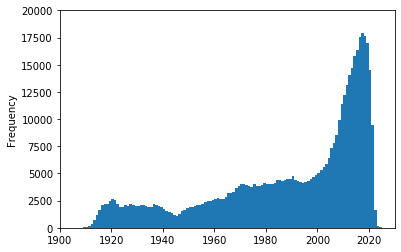

In [41]:
fechas=list(range(1900, 2030))
title_basics[title_basics['titleType']=='movie'].startYear.plot(kind = 'hist', stacked=True,bins=fechas)
plt.xlim(1900,2030)
plt.ylim(0,20000)

In [42]:
title_basics.head(4)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12.0,"Animation,Short"


In [43]:
movies=title_basics[title_basics['titleType']=='movie']
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905.0,NaN,100.0,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70.0,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,NaN,90.0,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907.0,NaN,NaN,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908.0,NaN,NaN,Drama


In [44]:
pelis_por_ano=pd.pivot_table(movies,values='primaryTitle',aggfunc='count',index=["startYear"])

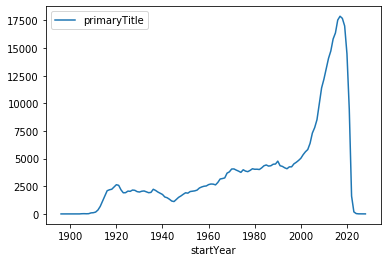

In [45]:
pelis_por_ano.plot()

In [46]:
pelis_por_ano.to_csv('peliano.csv')

In [47]:
!ls

001_usuarios_edades.ipynb  imdb-banner-1.jpeg
002_exploracion_imdb.ipynb peliano.csv


In [48]:
title_ratings = pd.read_csv(path+"title.ratings.tsv",sep="\t")

In [49]:
title_ratings.head(4)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1698
1,tt0000002,6.1,211
2,tt0000003,6.5,1457
3,tt0000004,6.1,124


In [50]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148911 entries, 0 to 1148910
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1148911 non-null  object 
 1   averageRating  1148911 non-null  float64
 2   numVotes       1148911 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 26.3+ MB


In [51]:
title_ratings['tconst']=title_ratings['tconst'].astype('string')

In [52]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148911 entries, 0 to 1148910
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1148911 non-null  string 
 1   averageRating  1148911 non-null  float64
 2   numVotes       1148911 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 26.3 MB


In [53]:
title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1698
1,tt0000002,6.1,211
2,tt0000003,6.5,1457
3,tt0000004,6.1,124
4,tt0000005,6.1,2256
5,tt0000006,5.2,125
6,tt0000007,5.4,687
7,tt0000008,5.4,1874
8,tt0000009,6.0,155
9,tt0000010,6.9,6316


In [54]:
result = pd.merge(movies,title_ratings, how='left', on=['tconst', 'tconst'])

In [55]:
result

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000502,movie,Bohemios,Bohemios,0,1905.0,NaN,100.0,\N,4.5,8.0
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70.0,"Action,Adventure,Biography",6.1,631.0
2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,NaN,90.0,Drama,6.0,5.0
3,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907.0,NaN,NaN,Drama,4.5,14.0
4,tt0000630,movie,Hamlet,Amleto,0,1908.0,NaN,NaN,Drama,3.8,12.0
...,...,...,...,...,...,...,...,...,...,...,...
575959,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015.0,NaN,57.0,Documentary,NaN,NaN
575960,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007.0,NaN,100.0,Documentary,NaN,NaN
575961,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013.0,NaN,NaN,Comedy,NaN,NaN
575962,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,\N,NaN,NaN


In [56]:
print('https://www.imdb.com/title/tt9916706/')

https://www.imdb.com/title/tt9916706/


In [57]:
movies_chica=result[['tconst','primaryTitle','startYear','runtimeMinutes','averageRating','numVotes']]

In [58]:
movies_chica

,tconst,primaryTitle,startYear,runtimeMinutes,averageRating,numVotes
0,tt0000502,Bohemios,1905.0,100.0,4.5,8.0
1,tt0000574,The Story of the Kelly Gang,1906.0,70.0,6.1,631.0
2,tt0000591,The Prodigal Son,1907.0,90.0,6.0,5.0
3,tt0000615,Robbery Under Arms,1907.0,NaN,4.5,14.0
4,tt0000630,Hamlet,1908.0,NaN,3.8,12.0
...,...,...,...,...,...,...
575959,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015.0,57.0,NaN,NaN
575960,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007.0,100.0,NaN,NaN
575961,tt9916706,Dankyavar Danka,2013.0,NaN,NaN,NaN
575962,tt9916730,6 Gunn,2017.0,116.0,NaN,NaN


In [59]:
movies_chica.isna().sum()

tconst                 0
primaryTitle           0
startYear          71838
runtimeMinutes    213442
averageRating     312884
numVotes          312884
dtype: int64

In [60]:
len(movies_chica)

575964

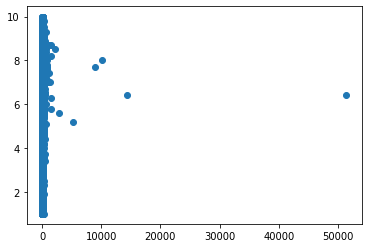

In [61]:
plt.scatter(x=movies_chica.runtimeMinutes,y=movies_chica.averageRating)

In [62]:
movies_chica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575964 entries, 0 to 575963
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          575964 non-null  string 
 1   primaryTitle    575964 non-null  string 
 2   startYear       504126 non-null  float64
 3   runtimeMinutes  362522 non-null  float64
 4   averageRating   263080 non-null  float64
 5   numVotes        263080 non-null  float64
dtypes: float64(4), string(2)
memory usage: 30.8 MB


In [63]:
movies_chica['duracion']=pd.cut(movies_chica.runtimeMinutes, bins=list(range(0,600,60)))

In [64]:
movies_chica.head()

,tconst,primaryTitle,startYear,runtimeMinutes,averageRating,numVotes,duracion
0,tt0000502,Bohemios,1905.0,100.0,4.5,8.0,"(60.0, 120.0]"
1,tt0000574,The Story of the Kelly Gang,1906.0,70.0,6.1,631.0,"(60.0, 120.0]"
2,tt0000591,The Prodigal Son,1907.0,90.0,6.0,5.0,"(60.0, 120.0]"
3,tt0000615,Robbery Under Arms,1907.0,NaN,4.5,14.0,NaN
4,tt0000630,Hamlet,1908.0,NaN,3.8,12.0,NaN


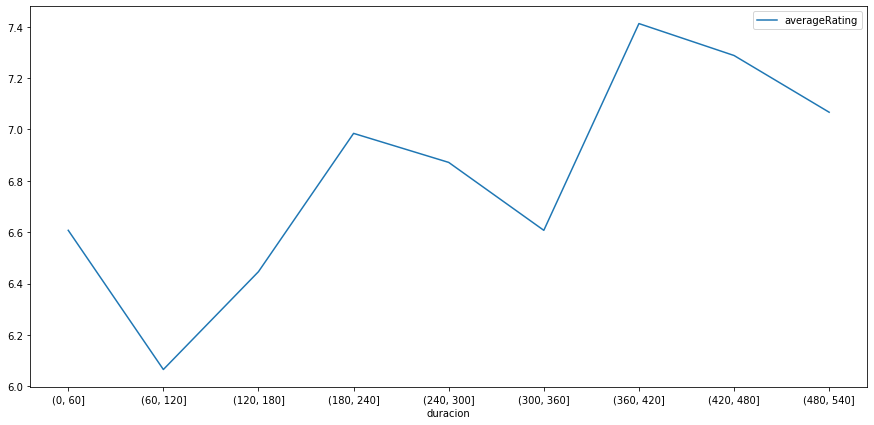

In [65]:
pd.pivot_table(movies_chica,values='averageRating',aggfunc=np.mean,index=["duracion"]).plot(figsize=(15, 7))
#plt.ylim(0,10)

In [66]:
pd.pivot_table(movies_chica,values='averageRating',aggfunc=[np.mean,'count'],index=["duracion"])

,mean,count
,averageRating,averageRating
duracion,,
"(0, 60]",6.607116,16132
"(60, 120]",6.065355,197139
"(120, 180]",6.446135,21292
"(180, 240]",6.984402,936
"(240, 300]",6.871429,259
"(300, 360]",6.607059,85
"(360, 420]",7.411765,34
"(420, 480]",7.287500,16


In [67]:
movies_chica.averageRating.isna().sum()

312884

In [68]:
movies_sin_nulos=movies_chica.dropna(axis=0)

In [69]:
len(movies_sin_nulos)

235883

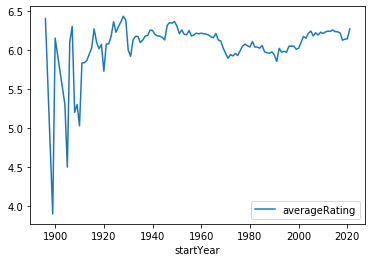

In [70]:
pd.pivot_table(movies_sin_nulos,values='averageRating',aggfunc=np.mean,index=["startYear"]).plot()

In [ ]:
pd.pivot_table(movies_sin_nulos,values='averageRating',aggfunc=[np.mean,'count'],index=["startYear"])

In [ ]:
movies_sin_nulos.sort_values(by=['averageRating'],ascending=False)

In [ ]:
movies_sin_nulos[movies_sin_nulos['numVotes']>100000].sort_values(by=['averageRating'],ascending=False)

In [ ]:
print('https://www.imdb.com/title/tt0112178/')

In [ ]:
movies_sin_nulos.insert(2,'url','https://www.imdb.com/title/'+movies_sin_nulos.tconst+'/')

In [ ]:
movies_sin_nulos

In [ ]:
movies.genres.unique()

In [ ]:
genres_list=[]
for ele in list(movies.genres.unique()):
    genres_list=genres_list+str(ele).split(sep=",")
genres_list = list(dict.fromkeys(genres_list))
genres_list

In [ ]:
movies.fillna('\\N',inplace=True)

In [ ]:
for ele in genres_list:
    movies[ele]=np.nan
movies.head()

In [ ]:
genres_list.remove('\\N')

In [ ]:
genres_list

In [ ]:
for ele in genres_list:
    movies.loc[movies['genres'].str.contains(ele),ele]=1

In [ ]:
movies.head(10)

In [ ]:
movies.isna().sum()

In [ ]:
movies.drop(columns='\\N',inplace=True)

In [ ]:
movies.fillna(0)

In [ ]:
title_basics.head()

In [ ]:
title_series=title_basics[title_basics.titleType=='tvSeries']
title_series[title_basics.primaryTitle.str.contains("Star Trek")]

In [ ]:
title_episode=pd.read_csv(path+"title.episode.tsv",sep="\t")
title_episode.head()

In [ ]:
title_episode[title_episode.parentTconst=='tt0092455']

In [ ]:
ratings=pd.merge(title_episode[title_episode.parentTconst=='tt0112178'],
                 title_ratings, how='left', on=['tconst', 'tconst'])

In [ ]:
ratings.sort_values(by=['averageRating']).tail(10)

In [ ]:
ratings.boxplot(column='averageRating',by='seasonNumber',figsize=(15, 7))